In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Użyteczne funkcje

In [4]:
def plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name):
    
    plt.plot(t_plot, x_plot, '-b', t_plot, vx_plot, '-r', t_plot, ax_plot, '-g', linewidth = 1)
    plt.ylabel('x(t), y(t), a(t)', fontsize = '14')
    plt.xlabel('t', fontsize = '14')
    plt.title(f"{algorithm_name}: x(t), v(t), a(t)", fontsize = '16')
    plt.ylim(-10, 10)
    plt.xlim(0, 25)
    plt.grid(color='grey', linestyle='--', linewidth=0.2)
    plt.legend(['x(t)', 'v(t)', 'a(t)'])
    plt.show()

# ------------------------------------------------------  
    
def plot_phase_space(vx_plot, x_plot, algorithm_name):

    plt.plot(vx_plot, x_plot, '-b', linewidth = 1)
    plt.title(f"{algorithm_name}: x(v)", fontsize = '16')
    plt.ylabel('v(t)', fontsize = '14')
    plt.xlabel('x(t)', fontsize = '14')

    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.grid(color='grey', linestyle='--', linewidth=0.2)
    plt.legend(['x(v)'])
    #plt.gca().set_aspect('equal')
    plt.show()

# ------------------------------------------------------

def plot_total_energy(t_plot, E_plot, algorithm_name):
    
    plt.plot(t_plot, E_plot, '-b', linewidth = 1)
    plt.ylabel('E(t)', fontsize = '14')
    plt.xlabel('t', fontsize = '14')
    plt.title(f"{algorithm_name}: Total Energy", fontsize = '16')
    plt.ylim(12.45, 12.55)
    plt.xlim(0, 100)
    plt.grid(color='grey', linestyle='--', linewidth=0.2)
    plt.legend(['E(t)'])
    plt.show()

In [6]:
A = 5
k = 1
m = 1

# Algorytm Verleta - standardowy

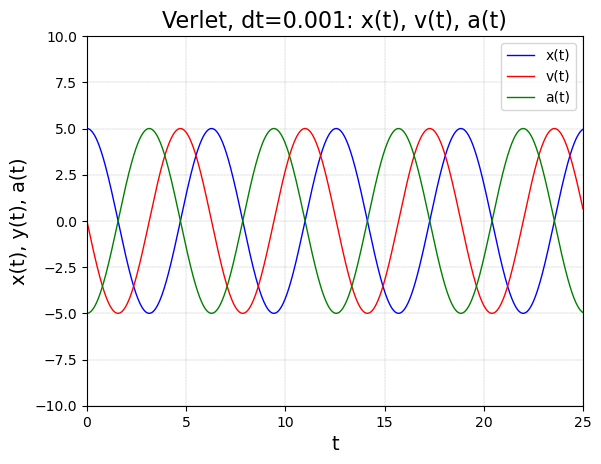

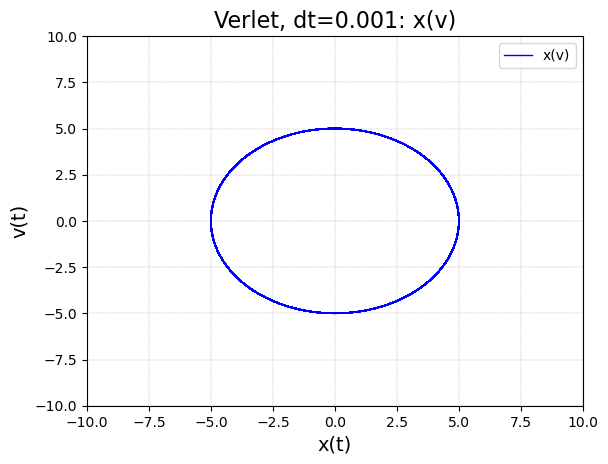

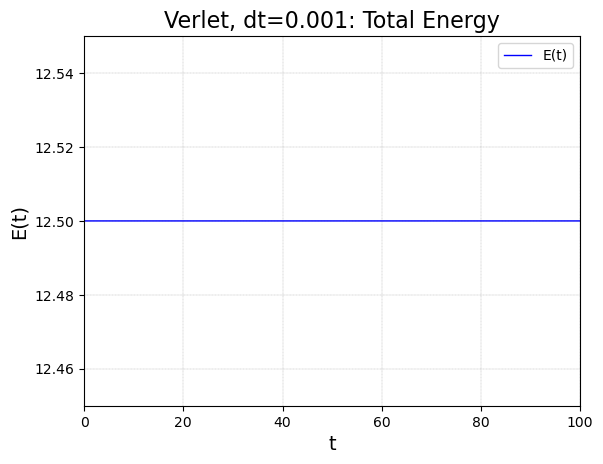

In [21]:
dt = 0.001
t=np.arange(0, 1000, dt)

x_st=[]
x_st.append(A);
x_st.append(math.sqrt(A**2 -(k/m)*(A*dt)**2));

vx_st=[]
vx_st.append(0)

ax_st=[]
ax_st.append(-(k/m)*x_st[0])
ax_st.append(-(k/m)*x_st[1])

for i in range(2, len(t)):
    x_st.append(2*x_st[i-1]-x_st[i-2]+(dt**2)*ax_st[i-1])
    ax_st.append(-(k/m)*x_st[i])
    vx_st.append((x_st[i]-x_st[i-2])/(2*dt))

last_x_st = 2*x_st[-1]-x_st[-2]+(dt**2)*ax_st[-1]
vx_st.append((last_x_st-x_st[-2])/(2*dt))

EK_st = []
EP_st = []
EC_st = []
EI_st = []

for i in range(len(x_st)):
    EK_st.append(0.5*m*vx_st[i]**2)
    EP_st.append(0.5*k*(x_st[i]**2))
    EC_st.append(EK_st[i]+EP_st[i])
    EI_st.append(EC_st[0])

dH = np.sqrt(np.mean(np.power(np.subtract(EI_st, EC_st), 2)))

t_plot = t.copy()
x_plot = x_st.copy()
vx_plot = vx_st.copy()
ax_plot = ax_st.copy()
E_plot = EC_st.copy()

algorithm_name = f"Verlet, dt={dt}"

plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)

# Algorytm Verleta - leap frog

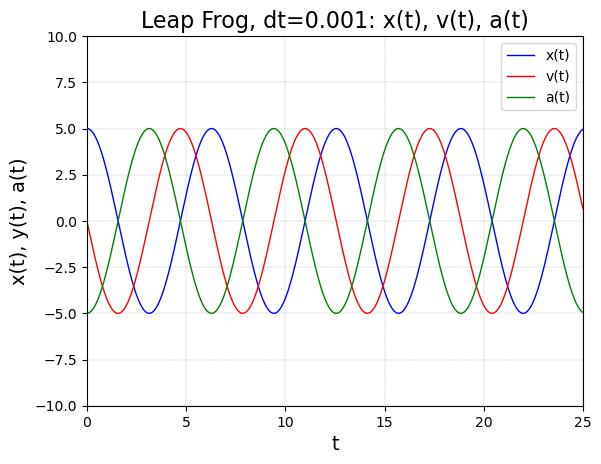

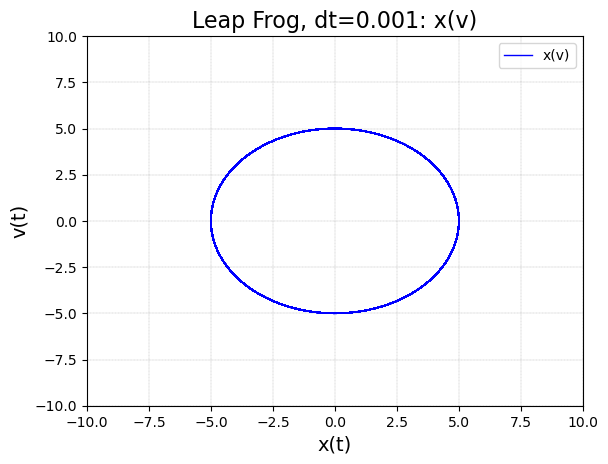

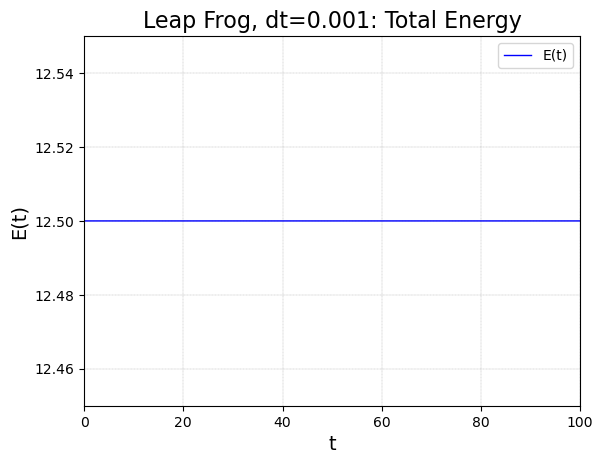

In [23]:
dt = 0.001
t=np.arange(0, 1000, dt)

x_lf=[]
x_lf.append(A);
x_lf.append(math.sqrt(A**2 -(k/m)*(A*dt)**2));

xp = math.sqrt(A**2 -(k/m)*(A*0.5*dt)**2)

vx_lf_hs=[]
vx_lf_hs.append(-(k/m)*math.sqrt(A**2-xp**2))

ax_lf=[]
ax_lf.append(-(k/m)*x_lf[0])
ax_lf.append(-(k/m)*x_lf[1])


for i in range(2, len(t)+1):
    vx_lf_hs.append(vx_lf_hs[i-2]+dt*ax_lf[i-1])
    x_lf.append(x_lf[i-1]+dt*vx_lf_hs[i-1])
    ax_lf.append(-(k/m)*x_lf[i])
    
vx_lf_hs.append(vx_lf_hs[-1] + dt*ax_lf[-1])

vx_lf = []
vx_lf.append(-(k/m)*math.sqrt(A**2-x_lf[0]**2))

for i in range(1, len(t)):
    vx_lf.append((x_lf[i+1]-x_lf[i-1])/(2*dt))

del x_lf[-1]
del ax_lf[-1]

EK_lf = []
EP_lf = []
EC_lf = []
EI_lf = []

for i in range(len(t)):
    EK_lf.append(0.5*m*vx_lf[i]**2)
    EP_lf.append(0.5*k*(x_lf[i]**2))
    EC_lf.append(EK_lf[i]+EP_lf[i])
    EI_lf.append(EC_lf[0])
    
dH = np.sqrt(np.mean(np.power(np.subtract(EI_lf, EC_lf), 2)))

t_plot = t.copy()
x_plot = x_lf.copy()
vx_plot = vx_lf.copy()
ax_plot = ax_lf.copy()
E_plot = EC_lf.copy()

algorithm_name = f"Leap Frog, dt={dt}"

plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)

# Algorytm Verleta - prędkościowy

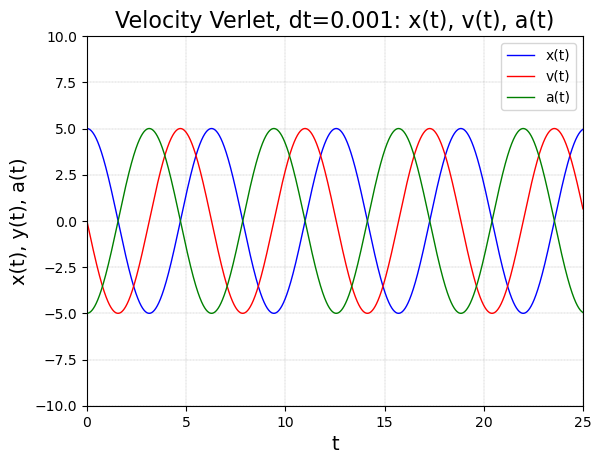

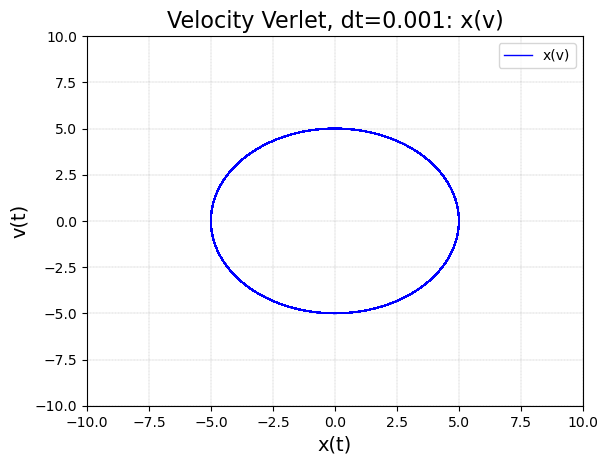

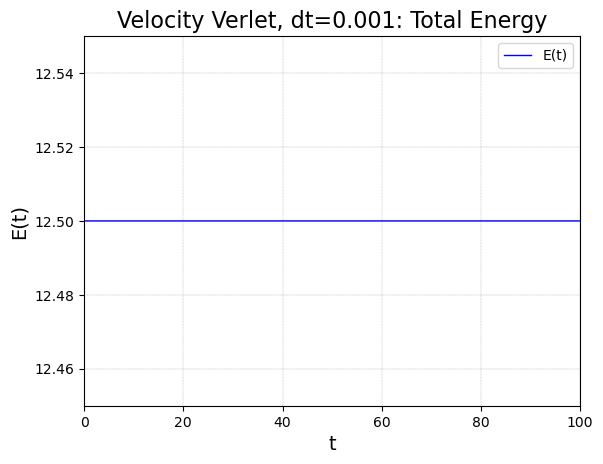

In [25]:
dt = 0.001
t=np.arange(0, 1000, dt)

x_vel = []
x_vel.append(A);

vx_vel = []
vx_vel.append(0)

ax_vel = []
ax_vel.append(-(k/m)*x_vel[0]);

for i in range(1, len(t)):
    x_vel.append(x_vel[i-1]+dt*vx_vel[i-1]+0.5*dt*dt*ax_vel[i-1])
    ax_vel.append(-(k/m)*x_vel[i])
    vx_vel.append(vx_vel[i-1]+0.5*dt*(ax_vel[i-1]+ax_vel[i]))

EK_vel = []
EP_vel = []
EC_vel = []
EI_vel = []

for i in range(len(t)):
    EK_vel.append(0.5*m*vx_vel[i]**2)
    EP_vel.append(0.5*k*(x_vel[i]**2))
    EC_vel.append(EK_vel[i]+EP_vel[i])
    EI_vel.append(EC_vel[0])
    
dH = np.sqrt(np.mean(np.power(np.subtract(EI_vel, EC_vel), 2)))

t_plot = t.copy()
x_plot = x_vel.copy()
vx_plot = vx_vel.copy()
ax_plot = ax_vel.copy()
E_plot = EC_vel.copy()

algorithm_name = f"Velocity Verlet, dt={dt}"

plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)

# Badanie odchyleń dH w zależności od dt

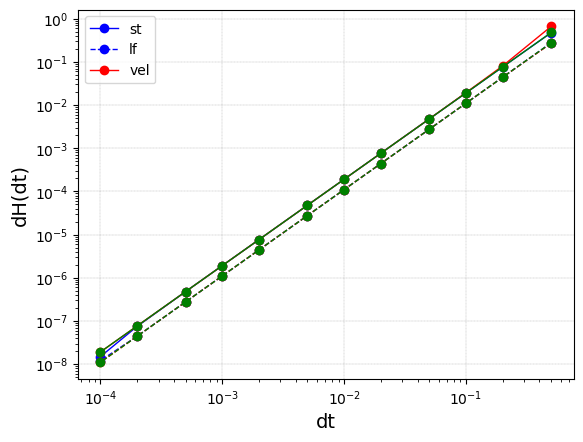

In [12]:
RMS_ver_st = []
std_ver_st = []

RMS_ver_lf = []
std_ver_lf = []

RMS_ver_vel = []
std_ver_vel = []

dt_tab = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001]

for item in dt_tab:
    dt = item
    t=np.arange(0, 1000, dt)

    x_st=[]
    x_st.append(A);
    x_st.append(math.sqrt(A**2 -(k/m)*(A*dt)**2));

    vx_st=[]
    vx_st.append(0)

    ax_st=[]
    ax_st.append(-(k/m)*x_st[0])
    ax_st.append(-(k/m)*x_st[1])
    

    for i in range(2, len(t)):
        x_st.append(2*x_st[i-1]-x_st[i-2]+(dt**2)*ax_st[i-1])
        ax_st.append(-(k/m)*x_st[i])
        vx_st.append((x_st[i]-x_st[i-2])/(2*dt))

    last_x_st = 2*x_st[-1]-x_st[-2]+(dt**2)*ax_st[-1]
    vx_st.append((last_x_st-x_st[-2])/(2*dt))

    EK_st = []
    EP_st = []
    EC_st = []
    EI_st = []
    dE_st = []

    for i in range(len(x_st)):
        EK_st.append(0.5*m*vx_st[i]**2)
        EP_st.append(0.5*k*(x_st[i]**2))
        EC_st.append(EK_st[i]+EP_st[i])
        EI_st.append(EC_st[0])
        dE_st.append((EK_st[i]+EP_st[i]) - EC_st[0])
        
        
    std = np.std(dE_st)
    RMS = np.sqrt(np.mean(np.power(np.subtract(EI_st, EC_st), 2)))

    RMS_ver_st.append(RMS)
    std_ver_st.append(std)
    
# ------------------------------------------------------
    
for item in dt_tab:
    dt = item
    t=np.arange(0, 1000, dt)

    x_lf=[]
    x_lf.append(A);
    x_lf.append(math.sqrt(A**2 -(k/m)*(A*dt)**2));

    xp = math.sqrt(A**2 -(k/m)*(A*0.5*dt)**2)

    vx_lf_hs=[]
    vx_lf_hs.append(-(k/m)*math.sqrt(A**2-xp**2))

    ax_lf=[]
    ax_lf.append(-(k/m)*x_lf[0])
    ax_lf.append(-(k/m)*x_lf[1])


    for i in range(2, len(t)+1):
        vx_lf_hs.append(vx_lf_hs[i-2]+dt*ax_lf[i-1])
        x_lf.append(x_lf[i-1]+dt*vx_lf_hs[i-1])
        ax_lf.append(-(k/m)*x_lf[i])
    
    vx_lf_hs.append(vx_lf_hs[-1] + dt*ax_lf[-1])

    vx_lf = []
    vx_lf.append(-(k/m)*math.sqrt(A**2-x_lf[0]**2))

    for i in range(1, len(t)):
        vx_lf.append((x_lf[i+1]-x_lf[i-1])/(2*dt))

    del x_lf[-1]
    del ax_lf[-1]

    EK_lf = []
    EP_lf = []
    EC_lf = []
    EI_lf = []
    dE_lf = []

    for i in range(len(t)):
        EK_lf.append(0.5*m*vx_lf[i]**2)
        EP_lf.append(0.5*k*(x_lf[i]**2))
        EC_lf.append(EK_lf[i]+EP_lf[i])
        EI_lf.append(EC_lf[0])
        dE_lf.append((EK_lf[i]+EP_lf[i]) - EC_lf[0])
    
    std = np.std(dE_lf)
    RMS = np.sqrt(np.mean(np.power(np.subtract(EI_lf, EC_lf), 2)))
    
    RMS_ver_lf.append(RMS)
    std_ver_lf.append(std)

# ------------------------------------------------------

for item in dt_tab:
    dt = item
    t=np.arange(0, 1000, dt)

    x_vel = []
    x_vel.append(A);

    vx_vel = []
    vx_vel.append(0)

    ax_vel = []
    ax_vel.append(-(k/m)*x_vel[0]);

    for i in range(1, len(t)):
        x_vel.append(x_vel[i-1]+dt*vx_vel[i-1]+0.5*dt*dt*ax_vel[i-1])
        ax_vel.append(-(k/m)*x_vel[i])
        vx_vel.append(vx_vel[i-1]+0.5*dt*(ax_vel[i-1]+ax_vel[i]))

    EK_vel = []
    EP_vel = []
    EC_vel = []
    EI_vel = []
    dE_vel = []

    for i in range(len(t)):
        EK_vel.append(0.5*m*vx_vel[i]**2)
        EP_vel.append(0.5*k*(x_vel[i]**2))
        EC_vel.append(EK_vel[i]+EP_vel[i])
        EI_vel.append(EC_vel[0])
        dE_vel.append((EK_vel[i]+EP_vel[i]) - EC_vel[0])
    
    std = np.std(dE_vel)
    RMS = np.sqrt(np.mean(np.power(np.subtract(EI_vel, EC_vel), 2)))
    
    RMS_ver_vel.append(RMS)
    std_ver_vel.append(std)

# ------------------------------------------------------

plt.plot(dt_tab, RMS_ver_st, 'o-b', linewidth = 1)
plt.plot(dt_tab, std_ver_st, 'o--b', linewidth = 1)
plt.plot(dt_tab, RMS_ver_lf, 'o-r', linewidth = 1)
plt.plot(dt_tab, std_ver_lf, 'o--r', linewidth = 1)
plt.plot(dt_tab, RMS_ver_vel, 'o-g', linewidth = 1)
plt.plot(dt_tab, std_ver_vel, 'o--g', linewidth = 1)
plt.ylabel('dH(dt)', fontsize = '14')
plt.xlabel('dt', fontsize = '14')
plt.xscale('log')
plt.yscale('log')
plt.grid(color='grey', linestyle='--', linewidth=0.2)
plt.legend(['st', 'lf', 'vel'])
plt.show() 
